In [111]:
%matplotlib inline
import numpy as np
import lmfit
import matplotlib.pyplot as plt
import pandas as pd
import corner
import astropy
import astropy.units as u
#from scipy.optimize import curve_fit

In [112]:
from astropy import constants as const


In [161]:
H0=70.* u.km / u.s / u.Mpc
c=const.c.to('km/s')
a=c/H0
a1=a.value
b=np.random.uniform(0., 50., 1000)

In [162]:
#print a1

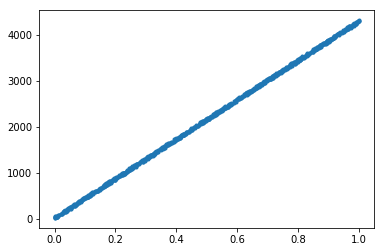

In [192]:
z= np.random.uniform(0., 1., 1000)
d= a1* z + b + np.random.normal(0., 5., 1000)
plt.plot(z, d, '.')

In [194]:
dat= {'z':np.random.uniform(0., 1., 1000), 
      'd':a1* z + b + np.random.normal(0., 5., 1000),
      'e': np.random.normal(0.,5., 1000)}
df = pd.DataFrame(data=dat)

In [195]:
data=np.sort(df.T, axis=0)
zs = df.z
mm = df.d
dm = df.e


In [196]:
print zs

0      0.222069
1      0.758640
2      0.197470
3      0.515339
4      0.296648
5      0.195608
6      0.897480
7      0.768835
8      0.748267
9      0.091733
10     0.840799
11     0.451654
12     0.319797
13     0.066075
14     0.812200
15     0.250398
16     0.117844
17     0.456143
18     0.613636
19     0.361902
20     0.145442
21     0.474694
22     0.510668
23     0.282145
24     0.561781
25     0.857828
26     0.672572
27     0.518054
28     0.568255
29     0.749690
         ...   
970    0.281536
971    0.690524
972    0.513063
973    0.478793
974    0.102167
975    0.658717
976    0.046976
977    0.652696
978    0.310462
979    0.626348
980    0.507809
981    0.670437
982    0.856460
983    0.100128
984    0.774721
985    0.643410
986    0.545131
987    0.360599
988    0.484304
989    0.185095
990    0.606020
991    0.828796
992    0.463988
993    0.336549
994    0.884726
995    0.852819
996    0.427924
997    0.269825
998    0.527700
999    0.888417
Name: z, Length: 1000, d

In [197]:
print mm

0      2184.118399
1      1932.274238
2       788.072241
3      2757.458036
4       443.085267
5      2322.632982
6       743.710284
7      4163.016172
8       203.781809
9      4232.001263
10     1467.559373
11     3798.786415
12     1767.331559
13     1342.951209
14     2344.494124
15      766.867969
16     3869.741420
17     3871.025444
18     3410.197315
19     2947.328319
20     2262.488257
21     3845.748876
22     1450.637794
23      749.584280
24      547.291763
25     1161.517207
26     3315.463322
27     1154.129552
28     1118.028824
29     2863.176129
          ...     
970    1024.112475
971     392.545317
972     117.262306
973     598.790620
974    2619.946664
975    4051.678006
976     954.323917
977    1714.199693
978    1914.769140
979    1838.149180
980    2871.236482
981    2075.020962
982    1576.131310
983    4228.736531
984     841.277754
985    2105.771472
986    2017.612068
987    4054.052404
988     291.744623
989    3079.451054
990    2672.727914
991    1294.

In [198]:
from astropy.cosmology import wCDM

In [199]:
def w(z) :
    wz=w0
    return wz

In [200]:
def DM(zz,H0,Om,Ode,w):
    cosmo = wCDM(H0=H0* u.km / u.s / u.Mpc, Om0=Om,Ode0=Ode,w0=w)
    DL=cosmo.luminosity_distance(zz)
    mag=5*np.log10((DL/(10*u.pc)).decompose())
    return mag

In [201]:
p = lmfit.Parameters()
p.add_many(('Om',0.3,True,0.,2.),('H0',70.0,True,50.,100.),('Ode',0.7,True,0.,2.),('w',-1.0,True,-2.,2.))

def residual(p):
    v = p.valuesdict()
    return (DM(zs,v['H0'],v['Om'],v['Ode'],v['w'])-mm)/dm

In [202]:
mi = lmfit.minimize(residual, p, method='nelder', nan_policy='omit')

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 1290
    # data points      = 127
    # variables        = 4
    chi-square         = 6.1045e+08
    reduced chi-square = 4963008.36
    Akaike info crit   = 1961.96103
    Bayesian info crit = 1973.33778
[[Variables]]
    Om:   0.00293552 (init = 0.3)
    H0:   57.6377089 (init = 70)
    Ode:  1.99711421 (init = 0.7)
    w:   -1.99976294 (init = -1)


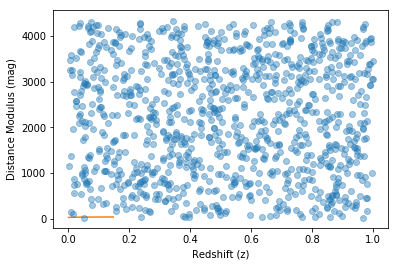

In [203]:
s = (zs.sort_values()).index
plt.errorbar(zs[s],mm[s],yerr=dm[s],fmt='o',alpha=0.4)
bestOm = mi.params.valuesdict()['Om']
bestH0 = mi.params.valuesdict()['H0']
bestOde= mi.params.valuesdict()['Ode']
bestw = mi.params.valuesdict()['w']
plt.plot(zs[s],DM(zs[s],bestH0,bestOm,bestOde,bestw))
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (mag)')
lmfit.report_fit(mi)

In [193]:
res = lmfit.minimize(residual, method='emcee', nan_policy='omit', burn=300, steps=1500, thin=1,
                         params=p, is_weighted=True)

emcee: Exception while calling your likelihood function:
  params: [ 0.30008321 70.04372957  0.69969829 -1.00044751]
  args: (<function residual at 0x7f2975adcc08>, Parameters([('Om', <Parameter 'Om', 0.30008320741106237, bounds=[0.0:2.0]>), ('H0', <Parameter 'H0', 70.04372957496608, bounds=[50.0:100.0]>), ('Ode', <Parameter 'Ode', 0.6996982863932673, bounds=[0.0:2.0]>), ('w', <Parameter 'w', -1.000447514325926, bounds=[-2.0:2.0]>)]), ['Om', 'H0', 'Ode', 'w'], array([[  0.,   2.],
       [ 50., 100.],
       [  0.,   2.],
       [ -2.,   2.]]))
  kwargs: {'nan_policy': 'omit', 'userkws': {}, 'userargs': [], 'is_weighted': True, 'float_behavior': 'posterior'}
  exception:


Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/home/alexandra/.local/lib/python2.7/site-packages/lmfit/minimizer.py", line 2015, in _lnpost
    out = userfcn(params, *userargs, **userkwargs)
  File "<ipython-input-190-e971801e6574>", line 6, in residual
    return (DM(zs,v['H0'],v['Om'],v['Ode'],v['w'])-mm)/dm
  File "<ipython-input-189-735944f1e451>", line 3, in DM
    DL=cosmo.luminosity_distance(zz)
  File "/home/alexandra/.local/lib/python2.7/site-packages/astropy/cosmology/core.py", line 1288, in luminosity_distance
    return (1. + z) * self.comoving_transverse_distance(z)
  File "/home/alexandra/.local/lib/python2.7/site-packages/astropy/cosmology/core.py", line 1194, in comoving_transverse_distance
    return self._comoving_transverse_distance_z1z2(0, z)
  File "/home/alexandra/.local/lib/python2.7/site-packages/astropy/cosmology/core.py", line 1

KeyboardInterrupt: 

In [ ]:
corner.corner(res.flatchain,labels=mi.var_names, truths=list(mi.params.valuesdict().values()))